In [1]:
import xarray as xr
import pandas as pd
import numpy as np

In [2]:
ds = xr.open_dataset("../output/grids/a3d_grids.nc")
var='swe'
ds

<xarray.Dataset>
Dimensions:                (easting: 168, northing: 107, time: 3746)
Coordinates:
  * time                   (time) datetime64[ns] 1980-01-01T01:00:00 ... 1980-06-05T02:00:00
  * northing               (northing) float32 -109000.0 -108000.0 ... -3000.0
  * easting                (easting) float32 -1542000.0 ... -1375000.0
Data variables:
    dw                     (time, northing, easting) float32 ...
    snd                    (time, northing, easting) float32 ...
    rlds                   (time, northing, easting) float32 ...
    rsds                   (time, northing, easting) float32 ...
    MS_SNOWPACK_RUNOFF     (time, northing, easting) float32 ...
    pr                     (time, northing, easting) float32 ...
    hur                    (time, northing, easting) float32 ...
    snow_density           (time, northing, easting) float32 ...
    SFC_SUBL               (time, northing, easting) float32 ...
    SURF_ALB               (time, northing, easting) float32 ...
    swe                    (time, northing, easting) float32 ...
    ta                     (time, northing, easting) float32 ...
    TOP_ALB                (time, northing, easting) float32 ...
    TSG                    (time, northing, easting) float32 ...
    ts                     (time, northing, easting) float32 ...
    ws                     (time, northing, easting) float32 ...
    VW_DRIFT               (time, northing, easting) float32 ...
    WINDEROSIONDEPOSITION  (time, northing, easting) float32 ...
Attributes:
    date_created:              2020-08-25
    creator_name:              erke2265
    source:                    MeteoIO-2.81
    history:                   2020-08-25T18:42:07Z, erke2265@shas0246.rc.int...
    keywords_vocabulary:       AGU Index Terms
    keywords:                  Cryosphere, Mass Balance, Energy Balance, Atmo...
    title:                     Gridded data for various parameters and timesteps
    institution:               colorado.edu
    product_version:           1.0
    Conventions:               CF-1.6,ACDD-1.3
    standard_name_vocabulary:  CF-1.6
    cdm_data_type:             Grid
    geospatial_bounds_crs:     EPSG:3031
    geospatial_bounds:         Polygon ((-1542000.0000000000 -109000.00000000...

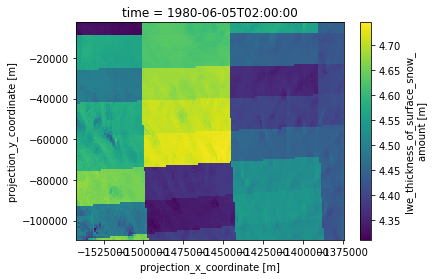

In [3]:
ds[var][-1,:,:].plot()

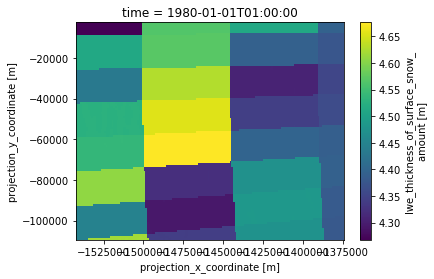

In [4]:
ds[var][0,:,:].plot()

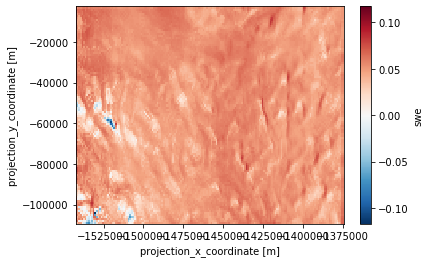

In [5]:
dswe = ds[var][-1,:,:] - ds[var][0,:,:]
dswe.plot()

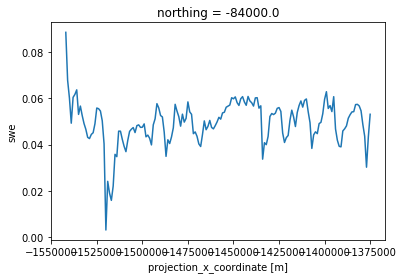

In [6]:
dswe.sel(northing=-84000).plot()

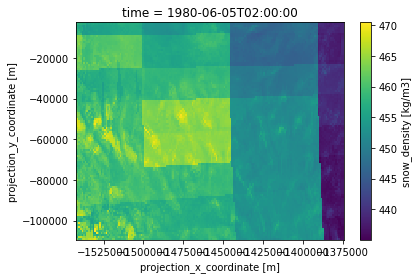

In [7]:
ds['snow_density'][-1,:,:].plot()

In [8]:
dswe.mean(dim='northing').mean(dim='easting')

<xarray.DataArray 'swe' ()>
array(0.04981545, dtype=float32)

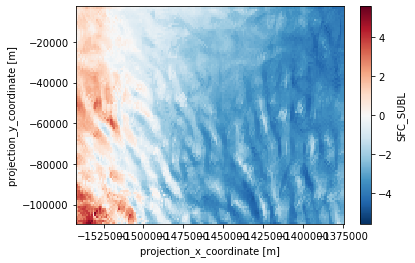

In [9]:
ds['SFC_SUBL'].sum(dim='time').plot()

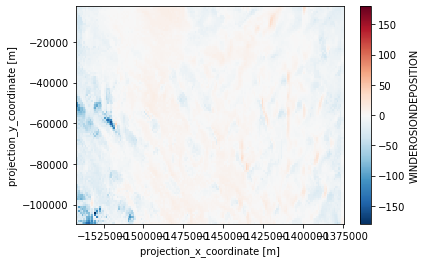

In [10]:
ds['WINDEROSIONDEPOSITION'].sum(dim='time').plot()

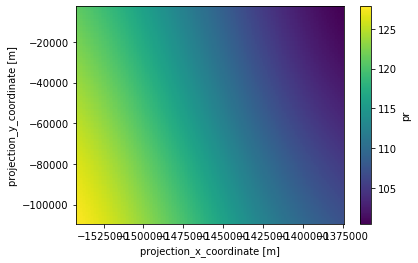

In [11]:
ds['pr'].sum(dim='time').plot()

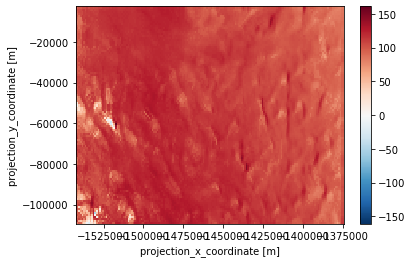

In [12]:
net = ds['pr'].sum(dim='time') + ds['WINDEROSIONDEPOSITION'].sum(dim='time')
net.plot()

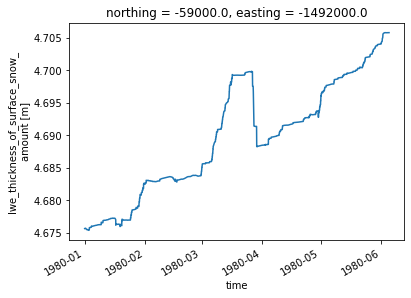

In [13]:
ds['swe'][:,50,50].plot()

In [14]:
def get_smet_timeseries(file_path, var_str):

    # Identify which row data begins in
    n = 100 # Only check the first 100 rows
    column_var = pd.read_csv(file_path, nrows = n)
    first_data_row = np.nan
    for j in range(1, n):
        if (column_var.iloc[j] == '[DATA]').all():
            first_data_row = j + 2 # Addhock solution
            break

    # Identify which columns to retrieve
    field_row =  np.loadtxt(file_path, skiprows = first_data_row - 2, max_rows = 1, dtype = 'str') 
    data_col = np.where(field_row == var_str)[0][0]
    data_col = data_col - 2 # Account for extra strings (Addhock)

    # Load data 
    time = np.loadtxt(file_path, skiprows = first_data_row, usecols = 0, dtype = 'str') 
    time = pd.to_datetime(time, format = '%Y-%m-%dT%H:%M:%S')
    ts = np.loadtxt(file_path, skiprows = first_data_row, usecols = data_col)

    # Create dataframe and set no data value to np.nan (0 if looking at MS_Redeposit_dHS)
    ts = pd.DataFrame(ts, index = time)
    if var_str == "MS_Redeposit_dHS" or var_str == "MS_Redeposit_dRHO":
        ts[ts == -999] = 0
    else:
        ts[ts == -999] = np.nan

    return ts

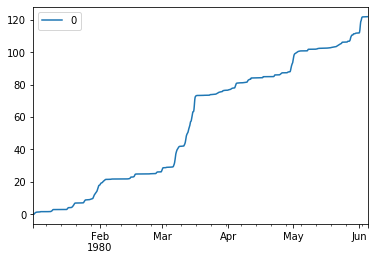

In [15]:
ts = get_smet_timeseries("/scratch/summit/erke2265/SNOWPACK_WAIS/output/meteo/13_75_thwaites_meteo.smet", "PSUM")
ts.cumsum().plot()

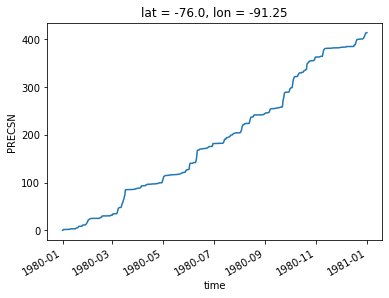

In [17]:
M2_ds = xr.open_dataset("/scratch/summit/erke2265/MERRA2/PRECSN_hourly_1980.nc")
M2_ds = M2_ds.sel(lat=-75.9915, lon=-91.2793, method='nearest') * 3600
M2_ds['PRECSN'].cumsum().plot()

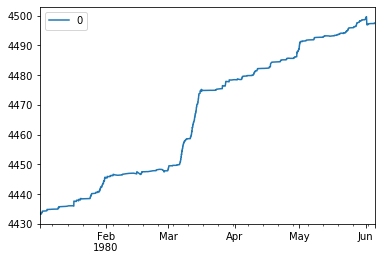

In [18]:
ts = get_smet_timeseries("/scratch/summit/erke2265/SNOWPACK_WAIS/output/meteo/13_75_thwaites.smet", "SWE")
ts.plot()

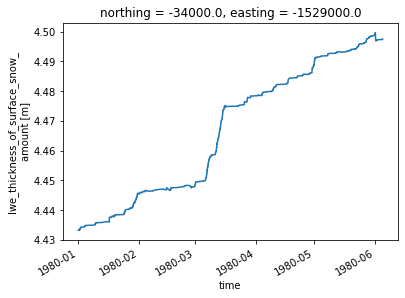

In [22]:
point_ds = ds.sel(northing=-34000.0, easting=-1529000.0, method='nearest')
point_ds['swe'].plot()

In [ ]:
p